<a href="https://colab.research.google.com/github/RafaelLVaz/Modelagem-Linear-para-Aprendizado-de-Maquina-Explorando-Dados/blob/main/EDA%20e%20IA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('sp2.csv', sep=';', decimal=',')
df.head()

,Data Medicao,"PRECIPITACAO TOTAL, DIARIO (AUT)(mm)",PRESSAO ATMOSFERICA MEDIA DIARIA (AUT)(mB),TEMPERATURA DO PONTO DE ORVALHO MEDIA DIARIA (AUT)(°C),"TEMPERATURA MAXIMA, DIARIA (AUT)(°C)","TEMPERATURA MEDIA, DIARIA (AUT)(°C)","TEMPERATURA MINIMA, DIARIA (AUT)(°C)","UMIDADE RELATIVA DO AR, MEDIA DIARIA (AUT)(%)","UMIDADE RELATIVA DO AR, MINIMA DIARIA (AUT)(%)","VENTO, RAJADA MAXIMA DIARIA (AUT)(m/s)","VENTO, VELOCIDADE MEDIA DIARIA (AUT)(m/s)",Unnamed: 11
0,2018-03-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-03-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2018-03-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,51.0,9.1,NaN,NaN
3,2018-03-16,0.2,926.4,20.0,27.8,24.2,21.2,78.1,62.0,9.1,1.8,NaN
4,2018-03-17,0.0,926.6,19.9,26.9,22.8,20.4,84.4,63.0,8.9,1.9,NaN


<ipython-input-48-61da3c48e221>:3: UserWarning: Parsing dates in %Y-%m-%d format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  df['Data Medicao'] = pd.to_datetime(df['Data Medicao'], dayfirst=True, errors='coerce')
<ipython-input-48-61da3c48e221>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['onda_calor'] = ((df['TEMPERATURA MAXIMA, DIARIA (AUT)(°C)'] > 32) &


[[452   0]
 [  1  20]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       452
           1       1.00      0.95      0.98        21

    accuracy                           1.00       473
   macro avg       1.00      0.98      0.99       473
weighted avg       1.00      1.00      1.00       473



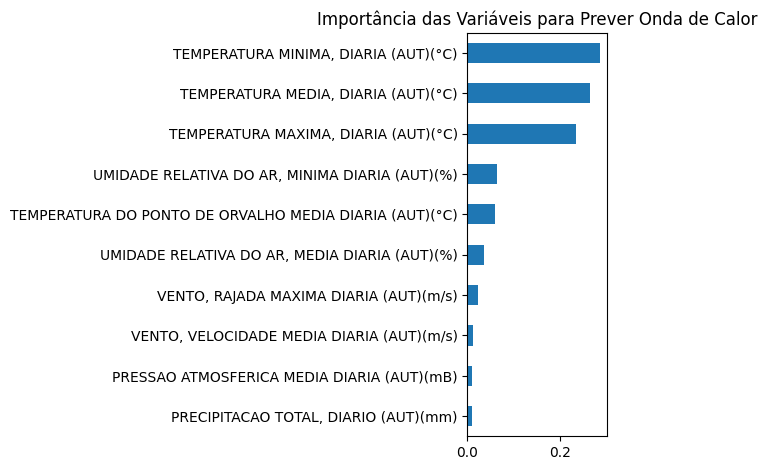

In [ ]:


# Carregando e preparando os dados
df = pd.read_csv('sp2.csv', sep=';', decimal=',')
df['Data Medicao'] = pd.to_datetime(df['Data Medicao'], dayfirst=True, errors='coerce')

# Remove linhas com valores nulos nas colunas essenciais
df = df.dropna(subset=[
    'TEMPERATURA MAXIMA, DIARIA (AUT)(°C)',
    'TEMPERATURA MINIMA, DIARIA (AUT)(°C)',
    'TEMPERATURA MEDIA, DIARIA (AUT)(°C)',
    'TEMPERATURA DO PONTO DE ORVALHO MEDIA DIARIA (AUT)(°C)',
    'UMIDADE RELATIVA DO AR, MEDIA DIARIA (AUT)(%)',
    'UMIDADE RELATIVA DO AR, MINIMA DIARIA (AUT)(%)',
    'PRESSAO ATMOSFERICA MEDIA DIARIA (AUT)(mB)',
    'VENTO, VELOCIDADE MEDIA DIARIA (AUT)(m/s)',
    'VENTO, RAJADA MAXIMA DIARIA (AUT)(m/s)',
    'PRECIPITACAO TOTAL, DIARIO (AUT)(mm)',
])

# Define "onda de calor": dias com temperatura máxima > 32°C e mínima > 20°C
df['onda_calor'] = ((df['TEMPERATURA MAXIMA, DIARIA (AUT)(°C)'] > 32) &
                    (df['TEMPERATURA MINIMA, DIARIA (AUT)(°C)'] > 20)).astype(int)

# Definindo todas as variáveis do print como features
features = [
    'PRECIPITACAO TOTAL, DIARIO (AUT)(mm)',
    'PRESSAO ATMOSFERICA MEDIA DIARIA (AUT)(mB)',
    'TEMPERATURA DO PONTO DE ORVALHO MEDIA DIARIA (AUT)(°C)',
    'TEMPERATURA MAXIMA, DIARIA (AUT)(°C)',
    'TEMPERATURA MEDIA, DIARIA (AUT)(°C)',
    'TEMPERATURA MINIMA, DIARIA (AUT)(°C)',
    'UMIDADE RELATIVA DO AR, MEDIA DIARIA (AUT)(%)',
    'UMIDADE RELATIVA DO AR, MINIMA DIARIA (AUT)(%)',
    'VENTO, RAJADA MAXIMA DIARIA (AUT)(m/s)',
    'VENTO, VELOCIDADE MEDIA DIARIA (AUT)(m/s)',
]

X = df[features]
y = df['onda_calor']

# Separação em treino/teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelo
modelo = RandomForestClassifier(n_estimators=100, random_state=42)
modelo.fit(X_train, y_train)

# Avaliação
y_pred = modelo.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Importância das variáveis
importances = pd.Series(modelo.feature_importances_, index=features)
importances.sort_values().plot(kind='barh')
plt.title('Importância das Variáveis para Prever Onda de Calor')
plt.tight_layout()
plt.show()


Matriz de Confusão:
 [[470   5]
 [  0 434]]

Relatório de Classificação:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99       475
           1       0.99      1.00      0.99       434

    accuracy                           0.99       909
   macro avg       0.99      0.99      0.99       909
weighted avg       0.99      0.99      0.99       909

F1-score médio na validação cruzada: 0.99 ± 0.00


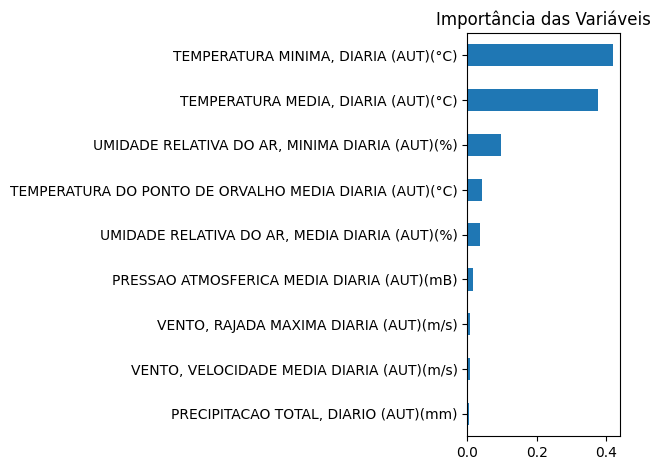

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

df['Data Medicao'] = pd.to_datetime(df['Data Medicao'], dayfirst=True, errors='coerce')

# 2. Remoção de linhas com dados essenciais ausentes
df = df.dropna(subset=[
    'TEMPERATURA MAXIMA, DIARIA (AUT)(°C)',
    'TEMPERATURA MINIMA, DIARIA (AUT)(°C)',
    'TEMPERATURA MEDIA, DIARIA (AUT)(°C)',
    'UMIDADE RELATIVA DO AR, MEDIA DIARIA (AUT)(%)',
    'PRESSAO ATMOSFERICA MEDIA DIARIA (AUT)(mB)',
    'PRECIPITACAO TOTAL, DIARIO (AUT)(mm)',
    'UMIDADE RELATIVA DO AR, MINIMA DIARIA (AUT)(%)',
    'VENTO, VELOCIDADE MEDIA DIARIA (AUT)(m/s)',
    'VENTO, RAJADA MAXIMA DIARIA (AUT)(m/s)',
    'TEMPERATURA DO PONTO DE ORVALHO MEDIA DIARIA (AUT)(°C)'
])

# 3. Criação da variável alvo: onda de calor
df['onda_calor'] = ((df['TEMPERATURA MAXIMA, DIARIA (AUT)(°C)'] > 32) &
                    (df['TEMPERATURA MINIMA, DIARIA (AUT)(°C)'] > 20)).astype(int)

# 4. Seleção de variáveis
features = [
    'TEMPERATURA MINIMA, DIARIA (AUT)(°C)',
    'TEMPERATURA MEDIA, DIARIA (AUT)(°C)',
    'UMIDADE RELATIVA DO AR, MEDIA DIARIA (AUT)(%)',
    'UMIDADE RELATIVA DO AR, MINIMA DIARIA (AUT)(%)',
    'PRESSAO ATMOSFERICA MEDIA DIARIA (AUT)(mB)',
    'PRECIPITACAO TOTAL, DIARIO (AUT)(mm)',
    'VENTO, VELOCIDADE MEDIA DIARIA (AUT)(m/s)',
    'VENTO, RAJADA MAXIMA DIARIA (AUT)(m/s)',
    'TEMPERATURA DO PONTO DE ORVALHO MEDIA DIARIA (AUT)(°C)'
]

X = df[features]
y = df['onda_calor']

# 5. Balanceamento com SMOTE
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

# 6. Divisão treino/teste
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

# 7. Modelo
modelo = RandomForestClassifier(n_estimators=100, random_state=42)
modelo.fit(X_train, y_train)

# 8. Avaliação no conjunto de teste
y_pred = modelo.predict(X_test)
print("Matriz de Confusão:\n", confusion_matrix(y_test, y_pred))
print("\nRelatório de Classificação:\n", classification_report(y_test, y_pred))

# 9. Validação cruzada (Stratified 5-fold)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(modelo, X_res, y_res, cv=cv, scoring='f1')
print(f"F1-score médio na validação cruzada: {scores.mean():.2f} ± {scores.std():.2f}")

# 10. Importância das variáveis
importances = pd.Series(modelo.feature_importances_, index=features)
importances.sort_values().plot(kind='barh', title='Importância das Variáveis')
plt.tight_layout()
plt.show()
